In [0]:
from sklearn.decomposition import PCA
import numpy as np
from word2vec import SkipGram
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
FILE = 'text.txt'
WINDOW = 7
EMBEDDING_DIM = 50
MIN_FREQ = 2
BATCH_SIZE = 32
EPOCHS = 100
LR = 1e-2

In [0]:
sg = SkipGram(FILE, window=WINDOW, embedding_dim=EMBEDDING_DIM, min_freq=MIN_FREQ)

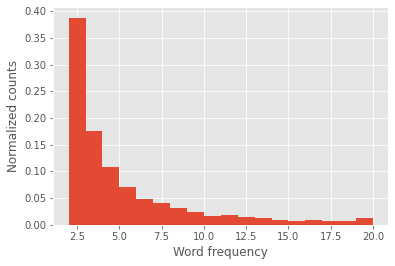

In [4]:
plt.hist(sg.vocab.values(), bins=range(MIN_FREQ, 21), density=True)
plt.xlabel('Word frequency')
plt.ylabel('Normalized counts')
plt.show()

In [5]:
hist = sg.train(epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LR)

100/100 epochs: loss 34.68686: 100%|██████████| 100/100 [09:16<00:00,  5.57s/it]


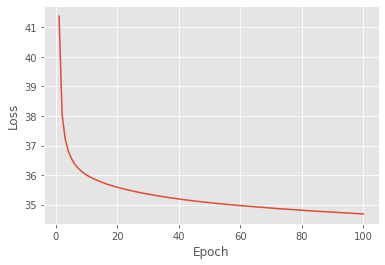

In [6]:
epochs = range(1, len(hist) + 1)
plt.plot(epochs, hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [23]:
sg.find_context('painter')

['the', 'of', 'in', 'to', 'he', 'and']

In [26]:
sg.find_most_similar('picture')

['picture', 'act', 'behind', 'asked', 'was']

In [0]:
def plot2d(model, n=50):
    idx = np.random.choice(len(model.V), n)

    pca = PCA(n_components=2)
    t = pca.fit_transform(model.V[idx, :])
    x, y = t[:, 0], t[:, 1]

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.scatter(x, y, s=50)

    words = list(map(lambda i: model.idx2word[i], idx))

    for i, word in enumerate(words):
        ax.annotate(word, (x[i], y[i]))

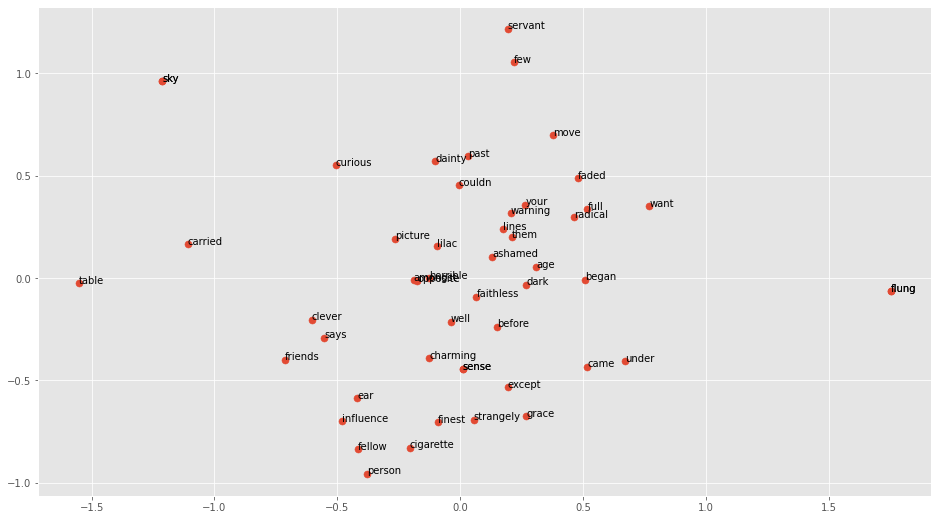

In [28]:
plot2d(sg)